# Statystyka w Analizie Danych

## Laboratorium 5 - algorytm normalizacja, selekcja cech.


### Opis
Celem laboratorium jest przeprowadzenie normalizacji i selekcji cech.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab05.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

#### Normalizacja
* Wczytaj dane.
* Znormalizuj dane.
* Przeprowadź eksperyment z zastosowaniem algorytmu kNN lub NM dla danych znormalizowanych oraz bez normalizacji.
    * W eksperymencie wybierz 5 klas oraz 10 cech.
* Przedstaw porównanie wyników klasyfikacji na danych znormalizowanych i bez normalizacji.
* Napisz wnioski.

**UWAGA: Wykorzystaj gotową implementację kNN [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**

In [35]:
# Importy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Wczytywanie danych
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

    train_y, train_x = np.hsplit(train, [1])
    test_y, test_x = np.hsplit(test, [1])
    
    train_y = train_y.flatten()
    test_y = test_y.flatten()
    
    data = {
        'train': {
            'x': train_x,
            'y': train_y,
        },
        'test': {
            'x': test_x,
            'y': test_y,
        }
    }

In [23]:
# Funkcja do filtrowania wybranych klas ze zbioru danych
def filter_classes(classes):
    train_indexes = np.zeros((data['train']['x'].shape[0],), dtype=np.bool_)
    test_indexes = np.zeros((data['test']['x'].shape[0],), dtype=np.bool_)
    
    for class_ in classes:
        train_indexes |= data['train']['y'] == class_
        test_indexes |= data['test']['y'] == class_
        
    new_train_x = data['train']['x'][train_indexes]
    new_test_x = data['test']['x'][test_indexes]
    new_train_y = data['train']['y'][train_indexes]
    new_test_y = data['test']['y'][test_indexes]
    
    new_data = {
        'train': {
            'x': new_train_x,
            'y': new_train_y,
        },
        'test': {
            'x': new_test_x,
            'y': new_test_y,
        }
    }
    
    return new_data

In [24]:
data_5classes = filter_classes([9, 10, 11, 12, 13])

### Bez skalowania

In [68]:
# Model i nauka
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

knn_without_scaling = make_pipeline(
    ColumnTransformer([('columns', 'passthrough', slice(0, 10))], remainder='drop'),
    KNeighborsClassifier(n_neighbors=5)
)

knn_without_scaling.fit(data_5classes['train']['x'], data_5classes['train']['y']);

In [69]:
# Ocena
from sklearn.metrics import classification_report

predictions = knn_without_scaling.predict(data_5classes['test']['x'])
report = classification_report(data_5classes['test']['y'], predictions)
print(report)

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00        33
        10.0       0.00      0.00      0.00        55
        11.0       1.00      0.88      0.93        88
        12.0       1.00      0.35      0.51        55
        13.0       0.00      0.00      0.00        44

    accuracy                           0.35       275
   macro avg       0.40      0.24      0.29       275
weighted avg       0.52      0.35      0.40       275



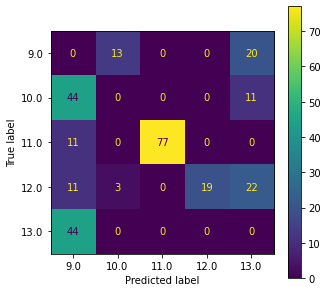

In [70]:
# macierz pomyłek
from sklearn.metrics import ConfusionMatrixDisplay
model, data = knn_without_scaling, data_5classes['test']
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
predictions = model.predict(data['x'])
ConfusionMatrixDisplay.from_predictions(data['y'], predictions, ax=ax);

### Ze skalowaniem

In [65]:
# Model i nauka
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

knn_with_scaling = make_pipeline(
    ColumnTransformer([('columns', 'passthrough', slice(0, 10))], remainder='drop'),
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

knn_with_scaling.fit(data_5classes['train']['x'], data_5classes['train']['y']);

In [66]:
# Ocena
from sklearn.metrics import classification_report

predictions = knn_with_scaling.predict(data_5classes['test']['x'])
report = classification_report(data_5classes['test']['y'], predictions)
print(report)

              precision    recall  f1-score   support

         9.0       0.31      0.48      0.38        33
        10.0       0.59      0.44      0.50        55
        11.0       1.00      1.00      1.00        88
        12.0       1.00      0.95      0.97        55
        13.0       1.00      0.98      0.99        44

    accuracy                           0.81       275
   macro avg       0.78      0.77      0.77       275
weighted avg       0.83      0.81      0.82       275



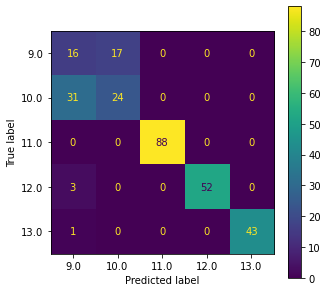

In [67]:
# macierz pomyłek
from sklearn.metrics import ConfusionMatrixDisplay
model, data = knn_with_scaling, data_5classes['test']
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
predictions = model.predict(data['x'])
ConfusionMatrixDisplay.from_predictions(data['y'], predictions, ax=ax);

### Wnioski

- Normalizacja danych znacznie poprawia wyniki.
- Klasa 9 jest często mylona z 10.
- W przypadku danych nieznormalizowanych klasa 9 jest często mylona z 13, po znormalizowaniu już nie.

#### Selekcja cech
Na tym samym podzbiorze danych (co w poprzednim zadaniu).
* Przeprowadź selekcję cech (wybierz {2, 5} cech) za pomocą metod poznanych na wykładzie (np. z zastosowaniem współczynnika Fishera) lub istniejących implementacji z biblioteki [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Przeprowadź klasyfikację na wybranych cechach.
* Porównaj wyniki klasyfikacji dla różnej liczby cech:
    * 10 cech bez normalizacji (wyniki z poprzedniego zadania),
    * 10 cech z normalizacją (wyniki z poprzedniego zadania),
    * 5 wybranych cech z bez normalizacji,
    * 5 wybranych cech z normalizacją,
    * 2 wybranych cech z bez normalizacji,
    * 2 wybranych cech z normalizacją.
* Opisz wyniki i napisz wnioski.


In [83]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def perform_test(n_features, normalize):
    
    model = make_pipeline(
        ColumnTransformer([('columns', 'passthrough', slice(0, 10))], remainder='drop'),
        SelectKBest(k=n_features),
        *([MinMaxScaler()] if normalize else []),
        KNeighborsClassifier(n_neighbors=5)
    )

    model.fit(data_5classes['train']['x'], data_5classes['train']['y']);

    # metryki
    predictions = model.predict(data_5classes['test']['x'])
    report = classification_report(data_5classes['test']['y'], predictions)
    print(report)
    
    # macierz pomyłek
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    predictions = model.predict(data['x'])
    ConfusionMatrixDisplay.from_predictions(data_5classes['test']['y'], predictions, ax=ax);

### 10 cech bez normalizacji

                  precision    recall  f1-score   support

             9.0       0.00      0.00      0.00        33
            10.0       0.00      0.00      0.00        55
            11.0       1.00      0.88      0.93        88
            12.0       1.00      0.35      0.51        55
            13.0       0.00      0.00      0.00        44

        accuracy                           0.35       275
       macro avg       0.40      0.24      0.29       275
    weighted avg       0.52      0.35      0.40       275

### 10 z normalizacją

                  precision    recall  f1-score   support

             9.0       0.31      0.48      0.38        33
            10.0       0.59      0.44      0.50        55
            11.0       1.00      1.00      1.00        88
            12.0       1.00      0.95      0.97        55
            13.0       1.00      0.98      0.99        44

        accuracy                           0.81       275
       macro avg       0.78      0.77      0.77       275
    weighted avg       0.83      0.81      0.82       275

### 5 wybranych cech bez normalizacji

              precision    recall  f1-score   support

         9.0       0.68      0.70      0.69        33
        10.0       0.82      0.85      0.84        55
        11.0       1.00      1.00      1.00        88
        12.0       1.00      0.93      0.96        55
        13.0       0.98      1.00      0.99        44

    accuracy                           0.92       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.92      0.92      0.92       275



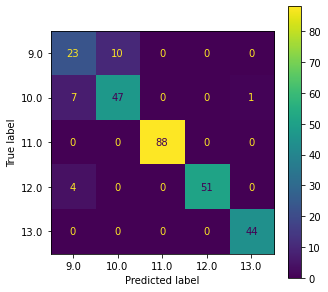

In [84]:
perform_test(n_features=5, normalize=False)

### 5 wybranych cech z normalizacją

              precision    recall  f1-score   support

         9.0       0.68      0.64      0.66        33
        10.0       0.80      0.87      0.83        55
        11.0       1.00      1.00      1.00        88
        12.0       1.00      0.93      0.96        55
        13.0       0.98      1.00      0.99        44

    accuracy                           0.92       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.92      0.92      0.92       275



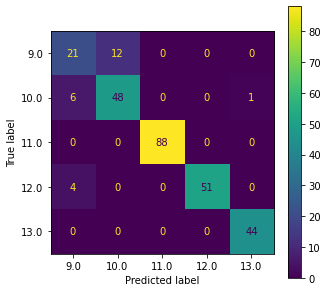

In [85]:
perform_test(n_features=5, normalize=True)

### 2 wybrane cechy bez normalizacji

              precision    recall  f1-score   support

         9.0       0.39      0.45      0.42        33
        10.0       0.47      0.67      0.56        55
        11.0       1.00      1.00      1.00        88
        12.0       0.31      0.09      0.14        55
        13.0       0.80      1.00      0.89        44

    accuracy                           0.69       275
   macro avg       0.60      0.64      0.60       275
weighted avg       0.65      0.69      0.65       275



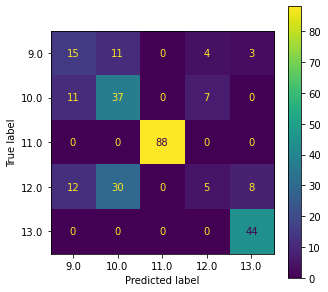

In [86]:
perform_test(n_features=2, normalize=False)

### 2 wybrane cechy z normalizacją

              precision    recall  f1-score   support

         9.0       0.42      0.45      0.43        33
        10.0       0.50      0.62      0.55        55
        11.0       1.00      1.00      1.00        88
        12.0       0.39      0.20      0.27        55
        13.0       0.80      1.00      0.89        44

    accuracy                           0.70       275
   macro avg       0.62      0.65      0.63       275
weighted avg       0.68      0.70      0.68       275



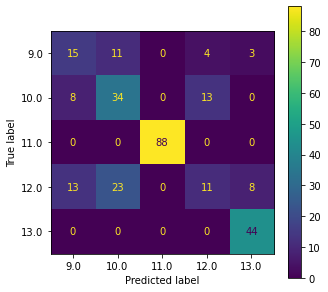

In [87]:
perform_test(n_features=2, normalize=True)

### Wnioski

- Nauka po wyborze cech działa lepiej niż bez wyboru, ponieważ usuwane są cechy które są bez znaczenia lub nawet przeszkadzają.
- Normalizacja poprawia wyniki, szczególnie w przypadku dużej liczby cech.
- Wybór 5 cech daje wyraźnie lepsze wyniki niż dwóch, co oznacza, że jest więcej istotnych cech niż 2.